# SK03.2.2 - Clusterung mit KMeans

k-Means wird verwendet, um Daten in Gruppen (Cluster) zu unterteilen, deren Mitglieder sich möglichst ähnlich sind. 
Es gehört zur Gruppe der Verfahren mit _unüberwachtem Lernen_. Die Daten sind also ungelabelt, und sollen allein auf Grund ihrer Merkmale eingeteilt werden. 

## Wann verwendet man k-Means?

Typische Einsatzgebiete sind 

* Kundensegmentierung
* Bildkompression
* Mustererkennung
* Anomalieerkennung

## Vor- und Nachteile von k-Means

Dabei hat k-Means die folgenden Vor-und Nachteile:

### Vorteile

* Es ist einfach und schnell zu implementieren
* Es skaliert gut mit großen Datensätzen
* Es liefert oft sinnvolle Gruppierungen bei klar getrennten Clustern

### Nachteile

* Die Anzahl der Cluster $k$ muss vorher festgelegt werden
* Es funktioniert schlecht bei unterschiedlich großen oder geformten Clustern
* Es ist empfindlich gegenüber Ausreißern und Anfangswerten
* Es ist nur für numerische Daten geeignet

## Wie funktioniert k-Means

Ziel von k-Means ist es, einen Datensatz $x_1,\ldots,x_N$ so in $k$ Cluster zu teilen, dass die Summe der quadrierten Abweichungen von den Schwerpunkten  $\mu_i$ minimal ist. Mathematisch entspricht dies der Minimierung der Funktion

$$ L = L(\mu_i,C_i) := \sum_{i=1}^k  \sum_{x_j \in C_i} |x_j - \mu_i|^2 $$

mit den Schwerpunkten $\mu_i$ der Cluster $C_i$. Man beachte, dass $x_j$  und $\mu_i$ Vektoren sind und $|x_j - \mu_i|$ der Euklidische Abstand.

Diese __Verlustfunktion__ ist wieder eine Fehlerquadratsumme, allerdings diesmal eine Doppelsumme, da über die Cluster $C_i$ summiert wird und darin jeweils über die quadratischen Abweichungen vom Mittelwert $\mu_j$, also die **Varianzen**. Daher spricht man auch von **Clustering durch Varianzminimierung**. 

Zu einer vorgegebenen Anzahl $k$ von Clustern ist also eine *optimale* Zuordnung der Daten zu den einzelnen Clustern gesucht, so dass die Varianz um die Mittelwerte (*means*) minimal ist.

## k-Means und die Iris-DB

Wir verwenden die Daten der Iris-DB und schauen, ob die von uns gebildeten Cluster mit den Labels übereinstimmen.

## Laden der Datenbank

Wir laden die Daten und Labels. Dabei benötigen wir die Labels nicht zum Training des Modells.

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)

## Visualisierung der Cluster

Wir tragen zwei der gemessenen Werte gegeneinander auf. 

In [2]:
import matplotlib.pyplot as plt

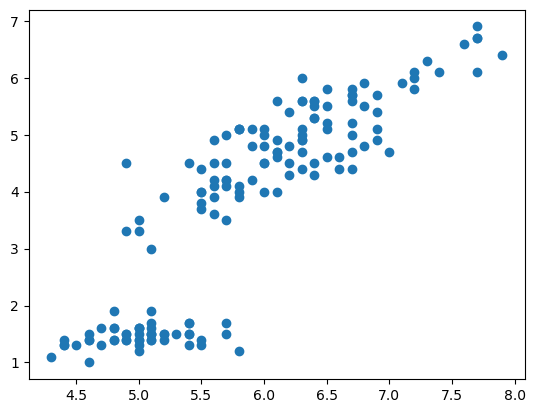

In [5]:
plt.scatter(X[:,0],X[:,2]);

### Das Modell

Wir nehmen an, dass Iris-Blüten derselben Sorte ähnliche Blütenabmessungen haben und daher im vierdimensionalen Parameterraum eng beieinander liegen. Da es drei verschiedene Sorten gibt, versuchen wir, die Daten in _drei_ Bereiche aufzuteilen. Wir verwenden also Vorwissen, um das Verfahren zu verwenden.

Üblicherweise kennen wir $k$ nicht, das ist eine der Schwächen von k-Means.

### Clusterung mit sklearn

Die Verfahren der Cluster-Analyse liegen im Paket `sklearn.cluster`. Das `KMeans`-Verfahren nimmt als wichtigsten Parameter die Zahl der gewünschten Cluster `n_clusters`, in unserem Fall 3. Danach werden die Daten mit `fit`-Methode analysiert:

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


#### Die Cluster-Mittelpunkte

Die Mittelpunkte der Cluster stellen eine Art "Idealwert" dar, um die die anderen Werte streuen:

In [9]:
cc = model.cluster_centers_
print(f'Cluster-Mittelpunkte =\n{cc}')

Cluster-Mittelpunkte =
[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


## Visualisierung

Wir tragen nun die Cluster-Mittelpunkte in unsere Visualisierung der Iris-Datenbank ein. Darüber hinaus markieren wir farblich die dazugehörenden Datenpunkte (als farbigen Punkt):

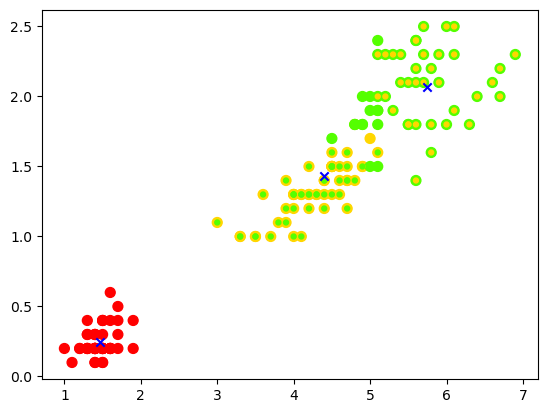

In [10]:
labels = model.labels_

y_pred = model.predict(X)

idx1, idx2 = 2, 3 # Unsere Perspektive

plt.scatter(X[:,idx1],X[:,idx2],s = 50,c = y,marker='o', cmap='prism')   
plt.scatter(X[:,idx1],X[:,idx2],s = 50,c = y_pred,marker='.', cmap='prism')   
plt.scatter(cc[:,idx1], cc[:,idx2], c = 'blue', marker = "x");


## Outliers - Ausreißer

Es ist oft interessanter, welche Punkte außerhalb eines Clusters, oder sehr weit entfernt vom Cluster-Mittelpunkt entfernt sind.

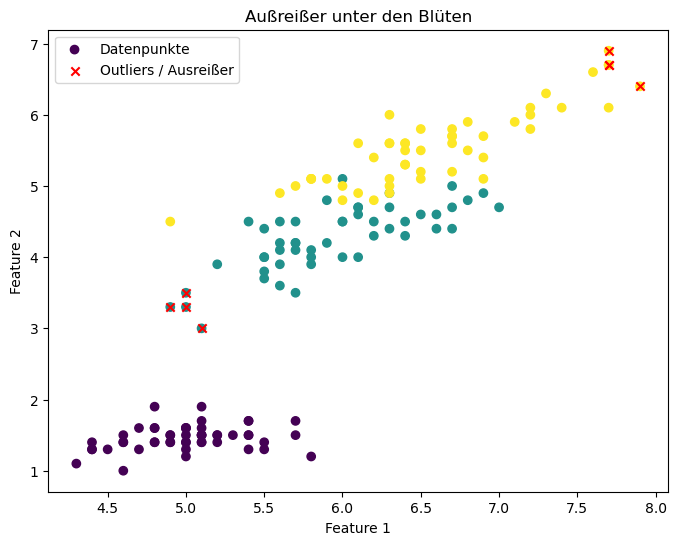

In [7]:
import numpy as np

distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = np.percentile(distances, 95)
outliers = X[distances > threshold]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, marker='o', label='Datenpunkte')
plt.scatter(outliers[:, 0], outliers[:, 2], c='red', marker='x', label='Outliers / Ausreißer')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Außreißer unter den Blüten')
plt.legend()
plt.show()

### Links

Clustering mit sklearn $\rightarrow$ [sklearn Dokumentation](https://scikit-learn.org/stable/modules/clustering.html)